# http로 파일 다운로드

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/MRI_images.zip

--2022-01-05 01:11:21--  https://github.com/dhrim/deep_learning_data/raw/master/MRI_images.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/MRI_images.zip [following]
--2022-01-05 01:11:21--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/MRI_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24016661 (23M) [application/zip]
Saving to: ‘MRI_images.zip’

MRI_images.zip      100%[===================>]  22.90M   153MB/s    in 0.2s    

2022-01-05 01:11:23 (153 MB/s) - ‘MRI_images.zip’ saved [24016661/24016661]



# zip파일 압축 풀기

In [ ]:
!unzip MRI_images.zip

Archive:  MRI_images.zip
   creating: MRI_images/
  inflating: MRI_images/LICENSE.txt  
  inflating: MRI_images/TCGA_CS_4941_19960909_1.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_10.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_10_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_11.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_11_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_12.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_12_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_13.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_13_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_14.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_14_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_15.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_15_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_16.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_16_mask.tif  
  inflating: MRI_images/TCGA_CS_4941_19960909_17.tif 

# 파일 리스트 구하기

In [ ]:
import glob
label_file_list = glob.glob("MRI_images/*_mask.tif")

In [ ]:
print(len(label_file_list))
print(label_file_list[:5])

218
['MRI_images/TCGA_CS_5393_19990606_14_mask.tif', 'MRI_images/TCGA_CS_5397_20010315_6_mask.tif', 'MRI_images/TCGA_CS_5393_19990606_7_mask.tif', 'MRI_images/TCGA_CS_5397_20010315_12_mask.tif', 'MRI_images/TCGA_CS_4941_19960909_3_mask.tif']


# some_mask.tif 파일 이름에서 some.tif 파일 이름 구하기

In [ ]:
image_file_list = [file_name.replace("_mask","") for file_name in label_file_list]
print(len(image_file_list))
print(image_file_list[:5])

218
['MRI_images/TCGA_CS_5393_19990606_14.tif', 'MRI_images/TCGA_CS_5397_20010315_6.tif', 'MRI_images/TCGA_CS_5393_19990606_7.tif', 'MRI_images/TCGA_CS_5397_20010315_12.tif', 'MRI_images/TCGA_CS_4941_19960909_3.tif']


# tif 파일 읽기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

images = []
for file_name in image_file_list:
    images.append(plt.imread(file_name))

images = np.array(images)
print(len(images))

labels = []
for file_name in label_file_list:
    labels.append(plt.imread(file_name))

labels = np.array(labels)
print(len(labels))

218
218


In [ ]:
print(images.shape)
print(labels.shape)

(218, 256, 256, 3)
(218, 256, 256)


# 읽은 영상 확인

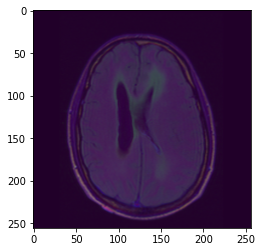

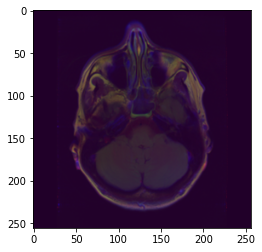

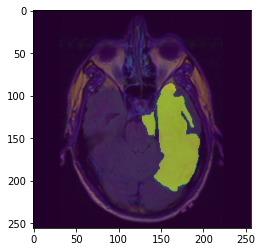

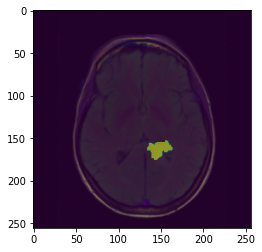

In [ ]:
for i in range(4):
    plt.imshow(images[i])
    plt.imshow(labels[i], alpha=0.5)
    plt.show()
            

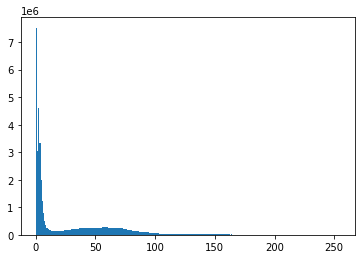

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
plt.hist(images.flatten(), bins=256)
plt.show()
print(images[0][0][0:10])

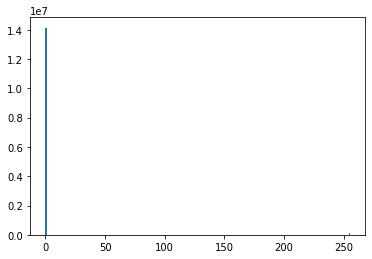

[0 0 0 0 0 0 0 0 0 0]
[  0 255]


In [ ]:
plt.hist(labels.flatten(), bins=256)
plt.show()
print(labels[0][0][0:10])
print(np.unique(labels))

# 데이터 전처리

In [ ]:
images = (images / 255.).astype(np.float)
labels = (labels / 255).astype(np.int16)

In [ ]:
print(np.min(images), np.max(images))
print(np.min(labels), np.max(labels))

0.0 1.0
0 1


In [ ]:
labels = np.expand_dims(labels, axis=-1)

In [ ]:
print(images.shape)
print(labels.shape)

(218, 256, 256, 3)
(218, 256, 256, 1)


In [ ]:
x = images
y = labels

## 데이터 나누기

In [ ]:
split_index = int(x.shape[0]*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(174, 256, 256, 3)
(174, 256, 256, 1)
(44, 256, 256, 3)
(44, 256, 256, 1)


train


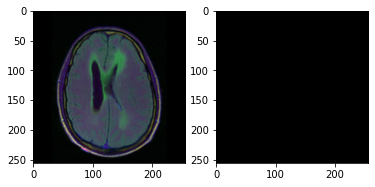

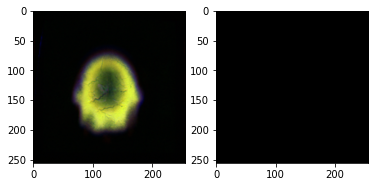

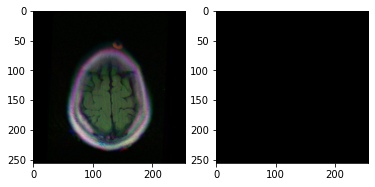

test


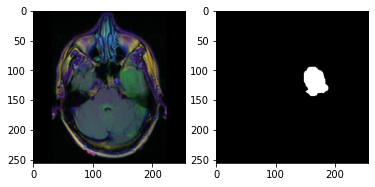

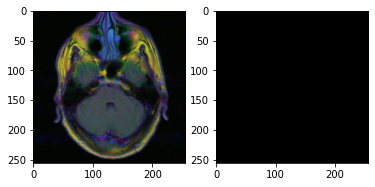

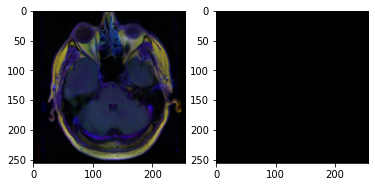

In [ ]:
import matplotlib.pyplot as plt

def plotTrainData(x, y, set_type):
    print(set_type)  
    for i in range(3):
        ix = np.random.randint(0, len(x))
        plt.subplot(1,2,1)
        plt.imshow(x[ix])
        
        plt.subplot(1,2,2)
        plt.imshow(np.squeeze(y[ix]), 'gray') # np.squeeze()는 (256,26,1)을 (256,256)으로 변환
        plt.show()
        
plotTrainData(train_x, train_y, 'train')
plotTrainData(test_x, test_y, 'test')

## U-Net 모델 정의

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    
    up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up, conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

## 모델 컴파일과 학습

In [ ]:
# 모델 생성
model = unet()

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001*0.1)
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
5/5 [==============================] - 3s 241ms/step - loss: 0.8872 - accuracy: 0.5105 - val_loss: 0.6923 - val_accuracy: 0.4798
Epoch 2/100
5/5 [==============================] - 1s 126ms/step - loss: 0.8011 - accuracy: 0.5191 - val_loss: 0.6896 - val_accuracy: 0.7251
Epoch 3/100
5/5 [==============================] - 1s 124ms/step - loss: 0.7618 - accuracy: 0.5616 - val_loss: 0.6882 - val_accuracy: 0.7532
Epoch 4/100
5/5 [==============================] - 1s 125ms/step - loss: 0.7382 - accuracy: 0.5669 - val_loss: 0.6874 - val_accuracy: 0.7126
Epoch 5/100
5/5 [==============================] - 1s 125ms/step - loss: 0.7209 - accuracy: 0.5831 - val_loss: 0.6861 - val_accuracy: 0.7134
Epoch 6/100
5/5 [==============================] - 1s 124ms/step - loss: 0.7093 - accuracy: 0.6128 - val_loss: 0.6848 - val_accuracy: 0.7288
Epoch 7/100
5/5 [==============================] - 1s 124ms/step - loss: 0.6979 - accuracy: 0.6366 - val_loss: 0.6839 - val_accuracy: 0.7073
Epoch 8/100
5

## 학습시 로스와 정확도 보기

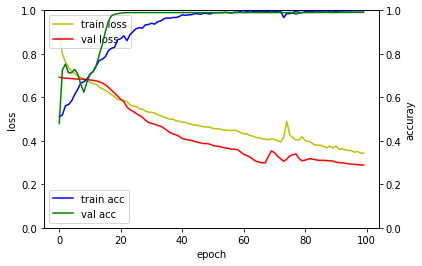

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 138ms/step - loss: 0.3408 - accuracy: 0.9982 - val_loss: 0.2870 - val_accuracy: 0.9907
Epoch 2/100
5/5 [==============================] - 1s 126ms/step - loss: 0.3413 - accuracy: 0.9982 - val_loss: 0.2864 - val_accuracy: 0.9907
Epoch 3/100
5/5 [==============================] - 1s 124ms/step - loss: 0.3347 - accuracy: 0.9986 - val_loss: 0.2852 - val_accuracy: 0.9908
Epoch 4/100
5/5 [==============================] - 1s 124ms/step - loss: 0.3354 - accuracy: 0.9984 - val_loss: 0.2834 - val_accuracy: 0.9910
Epoch 5/100
5/5 [==============================] - 1s 125ms/step - loss: 0.3308 - accuracy: 0.9985 - val_loss: 0.2827 - val_accuracy: 0.9912
Epoch 6/100
5/5 [==============================] - 1s 124ms/step - loss: 0.3278 - accuracy: 0.9986 - val_loss: 0.2815 - val_accuracy: 0.9914
Epoch 7/100
5/5 [==============================] - 1s 125ms/step - loss: 0.3257 - accuracy: 0.9986 - val_loss: 0.2801 - val_accuracy: 0.9916
Epoch 8/100
5

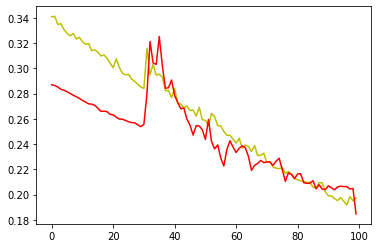

In [ ]:

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.show()

In [ ]:
# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 137ms/step - loss: 0.1931 - accuracy: 0.9992 - val_loss: 0.1777 - val_accuracy: 0.9950
Epoch 2/100
5/5 [==============================] - 1s 125ms/step - loss: 0.1954 - accuracy: 0.9987 - val_loss: 0.1804 - val_accuracy: 0.9968
Epoch 3/100
5/5 [==============================] - 1s 125ms/step - loss: 0.1901 - accuracy: 0.9990 - val_loss: 0.1768 - val_accuracy: 0.9971
Epoch 4/100
5/5 [==============================] - 1s 126ms/step - loss: 0.1871 - accuracy: 0.9993 - val_loss: 0.1907 - val_accuracy: 0.9968
Epoch 5/100
5/5 [==============================] - 1s 126ms/step - loss: 0.1872 - accuracy: 0.9992 - val_loss: 0.2021 - val_accuracy: 0.9965
Epoch 6/100
5/5 [==============================] - 1s 125ms/step - loss: 0.1872 - accuracy: 0.9992 - val_loss: 0.2012 - val_accuracy: 0.9964
Epoch 7/100
5/5 [==============================] - 1s 124ms/step - loss: 0.2076 - accuracy: 0.9946 - val_loss: 0.4672 - val_accuracy: 0.9892
Epoch 8/100
5

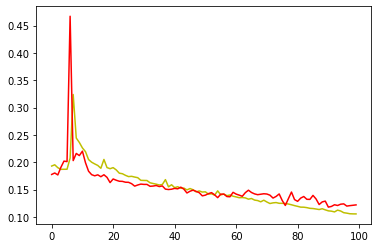

In [ ]:

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.show()

In [ ]:
# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 142ms/step - loss: 0.1040 - accuracy: 0.9994 - val_loss: 0.1222 - val_accuracy: 0.9970
Epoch 2/100
5/5 [==============================] - 1s 126ms/step - loss: 0.1083 - accuracy: 0.9992 - val_loss: 0.1106 - val_accuracy: 0.9972
Epoch 3/100
5/5 [==============================] - 1s 125ms/step - loss: 0.1048 - accuracy: 0.9993 - val_loss: 0.1042 - val_accuracy: 0.9961
Epoch 4/100
5/5 [==============================] - 1s 124ms/step - loss: 0.1078 - accuracy: 0.9990 - val_loss: 0.1121 - val_accuracy: 0.9970
Epoch 5/100
5/5 [==============================] - 1s 124ms/step - loss: 0.1076 - accuracy: 0.9991 - val_loss: 0.1176 - val_accuracy: 0.9971
Epoch 6/100
5/5 [==============================] - 1s 124ms/step - loss: 0.1066 - accuracy: 0.9989 - val_loss: 0.1054 - val_accuracy: 0.9970
Epoch 7/100
5/5 [==============================] - 1s 124ms/step - loss: 0.1035 - accuracy: 0.9992 - val_loss: 0.1119 - val_accuracy: 0.9971
Epoch 8/100
5

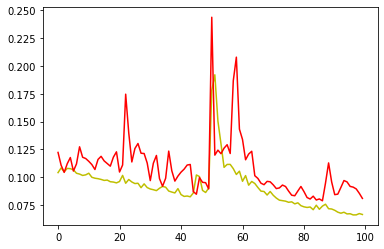

In [ ]:

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.show()

In [ ]:
# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 142ms/step - loss: 0.0641 - accuracy: 0.9989 - val_loss: 0.0702 - val_accuracy: 0.9965
Epoch 2/100
5/5 [==============================] - 1s 124ms/step - loss: 0.0641 - accuracy: 0.9989 - val_loss: 0.0719 - val_accuracy: 0.9968
Epoch 3/100
5/5 [==============================] - 1s 125ms/step - loss: 0.0637 - accuracy: 0.9990 - val_loss: 0.0796 - val_accuracy: 0.9970
Epoch 4/100
5/5 [==============================] - 1s 124ms/step - loss: 0.0618 - accuracy: 0.9991 - val_loss: 0.0800 - val_accuracy: 0.9970
Epoch 5/100
5/5 [==============================] - 1s 125ms/step - loss: 0.0628 - accuracy: 0.9990 - val_loss: 0.0810 - val_accuracy: 0.9970
Epoch 6/100
5/5 [==============================] - 1s 124ms/step - loss: 0.0628 - accuracy: 0.9991 - val_loss: 0.0823 - val_accuracy: 0.9970
Epoch 7/100
5/5 [==============================] - 1s 126ms/step - loss: 0.0626 - accuracy: 0.9991 - val_loss: 0.0802 - val_accuracy: 0.9970
Epoch 8/100
5

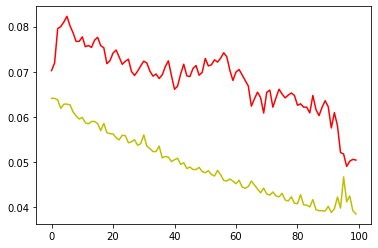

In [ ]:

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.show()

In [ ]:
# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
5/5 [==============================] - 1s 141ms/step - loss: 0.0381 - accuracy: 0.9994 - val_loss: 0.0525 - val_accuracy: 0.9971
Epoch 2/500
5/5 [==============================] - 1s 126ms/step - loss: 0.0378 - accuracy: 0.9994 - val_loss: 0.0545 - val_accuracy: 0.9972
Epoch 3/500
5/5 [==============================] - 1s 125ms/step - loss: 0.0372 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9972
Epoch 4/500
5/5 [==============================] - 1s 123ms/step - loss: 0.0379 - accuracy: 0.9995 - val_loss: 0.0534 - val_accuracy: 0.9971
Epoch 5/500
5/5 [==============================] - 1s 124ms/step - loss: 0.0388 - accuracy: 0.9992 - val_loss: 0.0538 - val_accuracy: 0.9971
Epoch 6/500
5/5 [==============================] - 1s 125ms/step - loss: 0.0374 - accuracy: 0.9995 - val_loss: 0.0530 - val_accuracy: 0.9971
Epoch 7/500
5/5 [==============================] - 1s 124ms/step - loss: 0.0368 - accuracy: 0.9995 - val_loss: 0.0529 - val_accuracy: 0.9971
Epoch 8/500
5

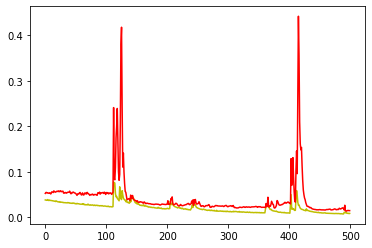

In [ ]:

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.show()

## 테스트 결과 보기

In [ ]:
import matplotlib.pyplot as plt

def plotPredictions(model, train_x, train_y, test_x, test_y):

    ix = np.random.randint(0, len(train_x))

    input_ = train_x[ix:ix+1]
    mask_ = train_y[ix:ix+1]

    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("train_x")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("train_y")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')
    plt.show()


    for i in range(5):
        ix = i
        input_ = test_x[ix:ix+1]
        mask_ = test_y[ix:ix+1]
        preds_test = model.predict(input_)
        preds_test_t = (preds_test > 0.5).astype(np.uint8)
        
        plt.figure(figsize=(10,10))
        plt.subplot(1,3,1)
        plt.title("X_test")
        plt.axis('off')
        plt.imshow(input_[0])
        plt.subplot(1,3,2)
        plt.title("test_y")
        plt.axis('off')
        plt.imshow(mask_[0][:,:,0], 'gray')
        plt.subplot(1,3,3)
        ret = model.evaluate(input_, mask_)
        plt.title("Prediction: %.4f" % (ret[1]))
        plt.axis('off')
        plt.imshow(preds_test_t[0][:,:,0], 'gray')
        plt.show()

1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000


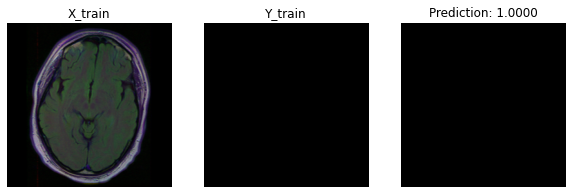

1/1 [==============================] - 0s 22ms/step - loss: 0.0058 - accuracy: 1.0000


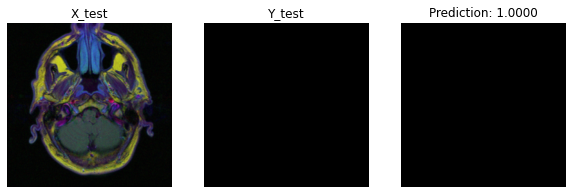

1/1 [==============================] - 0s 22ms/step - loss: 0.0197 - accuracy: 0.9977


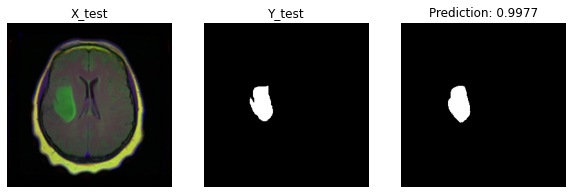

1/1 [==============================] - 0s 23ms/step - loss: 0.0284 - accuracy: 0.9940


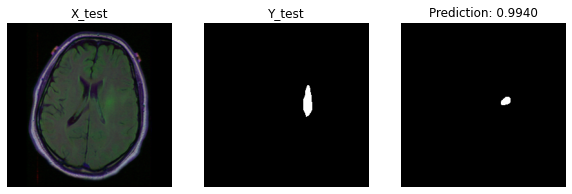

1/1 [==============================] - 0s 22ms/step - loss: 0.0058 - accuracy: 1.0000


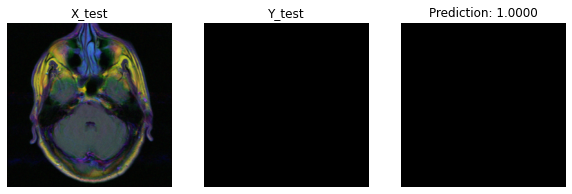

1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 0.9995


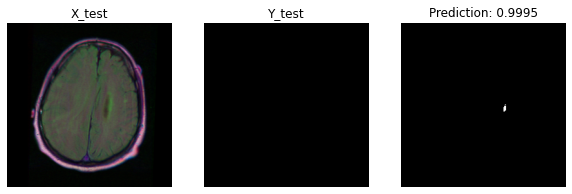

In [ ]:
plotPredictions(model, train_x, train_y, test_x, test_y)